In [5]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FixedLocator
import seaborn as sns

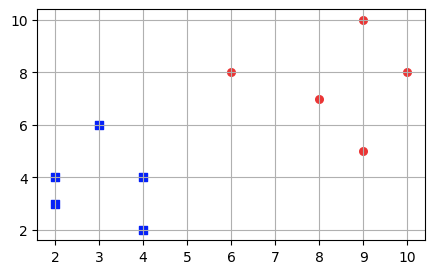

In [3]:
x=np.array([[4,2],[2,4],[2,3],[3,6],[4,4],
        [9, 10], [6,8], [9,5], [8,7], [10,8]])

Y=np.array([0,0,0,0,0,1,1,1,1,1])

plt.rcParams["figure.figsize"] = (5,3)

plt.scatter(x[Y==0][:,0],x[Y==0][:,1],marker='s',c='#0521f7', s=30)

plt.scatter(x[Y==1][:,0],x[Y==1][:,1],marker='o',c='#eb3434', s=30)

plt.grid()

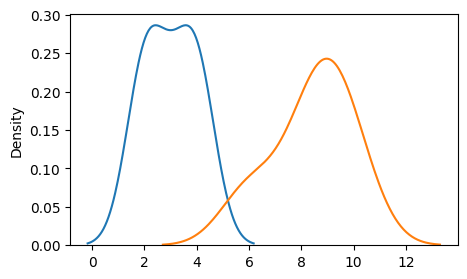

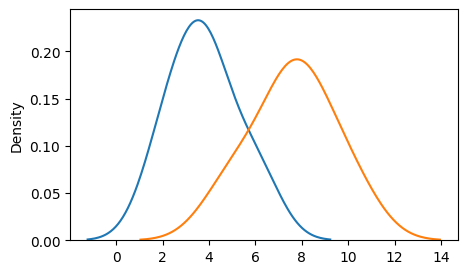

In [6]:
plt.rcParams["figure.figsize"] = (5,3)
sns.kdeplot(x[:,0][Y==0]);
sns.kdeplot(x[:,0][Y==1]);
plt.show()
plt.rcParams["figure.figsize"] = (5,3)
sns.kdeplot(x[:,1][Y==0]);
sns.kdeplot(x[:,1][Y==1]);
plt.show()

In [7]:
# compute mean vectors
mean_vectors=[]

for i in range (0,x.shape[1]):

    mean_vectors.append(np.mean(x[Y==i], axis=0))

mean_vectors

[array([3. , 3.8]), array([8.4, 7.6])]

In [8]:
# Covariance matrices of classes

cov_dict={}

for i in range(0,x.shape[1],1):

    N_i = (x[Y==i].shape)[0]-1

    mean_err = x[Y==i]-mean_vectors[i]

    cov_dict.update({ 'S_'+str(i): ((mean_err).T).dot(mean_err) / N_i })

# Within-class scater matrix

S_W = sum(list(cov_dict.values()))

# Between-class scatter matrix

S_B = (mean_vectors[0]-mean_vectors[1]).reshape(-1,1).dot(mean_vectors[0]-mean_vectors[1].reshape(1,-1))

print('Within-class scatter matrix:','\n',S_W)

print('Between-class scatter matrix:','\n',S_B)

Within-class scatter matrix: 
 [[ 3.3 -0.3]
 [-0.3  5.5]]
Between-class scatter matrix: 
 [[29.16 20.52]
 [20.52 14.44]]


In [10]:
# generaiting eigen pairs

eig_val, eig_vec=np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

eigen_pairs = [(np.abs(eig_val[i]), eig_vec[:,i])
                for i in range(len(eig_val))]

eigen_pairs = sorted(eigen_pairs,reverse=True)

for i in eigen_pairs:

    print(i[0]) # Sorted eigenvalues


12.20066445182724
0.0


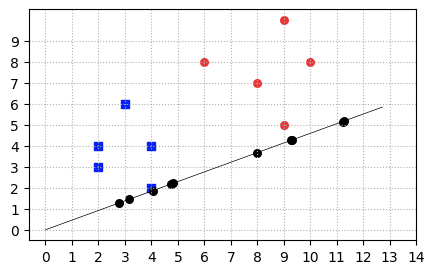

In [11]:

# Projection vector corresponding to the highest eigen value and vectors projection on new dimension

plt.scatter(x[Y==0][:,0],x[Y==0][:,1],marker='s',c='#0521f7', s=30)

plt.scatter(x[Y==1][:,0],x[Y==1][:,1],marker='o',c='#eb3434', s=30)

x_proj,y_proj=np.dot(eigen_pairs[0][1].reshape(-1,1),np.matrix(x.dot(eigen_pairs[0][1])))

plt.scatter(np.array(x_proj)[0],np.array(y_proj)[0], marker='o',s=30, c='black')

x_,y_=(np.arange(0,x.max()+5,1).reshape(-1,1)*eigen_pairs[0][1]).T

plt.plot(x_.T,y_.T,color = 'black',linewidth=0.5)

plt.xticks(np.arange(0,x.max()+5))

plt.yticks(np.arange(0,x.max()))

plt.grid(linestyle=':')


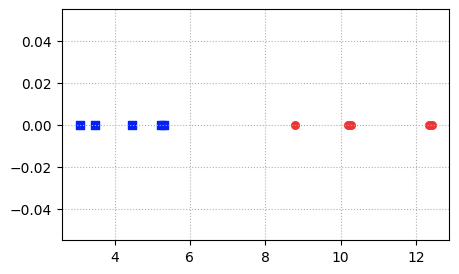

In [12]:
plt.scatter(x.dot(eigen_pairs[0][1]).reshape(-1,1)[Y==0],[0] * x.dot(eigen_pairs[0][1]).reshape(-1,1)[Y==0], marker='s',c='#0521f7', s=30)

plt.scatter(x.dot(eigen_pairs[0][1]).reshape(-1,1)[Y==1],[0] * x.dot(eigen_pairs[0][1]).reshape(-1,1)[Y==1], marker='o',c='#eb3434', s=30)

plt.grid(linestyle=':')

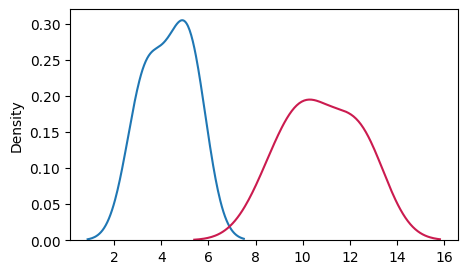

In [13]:
# density function plot showing increase in class separatability moving to new dimension
fig, ax = plt.subplots()
sns.kdeplot(x.dot(eigen_pairs[0][1]).reshape(-1,1)[Y==0],legend=None);
sns.kdeplot(x.dot(eigen_pairs[0][1]).reshape(-1,1)[Y==1],palette="rocket",legend=None);